<h1> Deep Learning Small Project </h1>

In [1]:
%matplotlib inline

# Display
from IPython.display import Image

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn

# Custom
import data
import model
import utils

Using Custom Dataloader, Data Split for First Layer classification task (normal vs infected)

In [2]:
fl_labels = {
0 : "Normal",
1 : "Infected"
}

fl_train = data.Lung_Dataset('train', verbose = 0)
fl_test = data.Lung_Dataset('val', verbose = 0)
fl_val = data.Lung_Dataset('test', verbose = 0)

"""
Data Split for Second Layer classification task (COVID vs Non-COVID) 
"""

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

sl_train = data.Lung_Dataset('train', verbose = 2)
sl_test = data.Lung_Dataset('val', verbose = 2)
sl_val = data.Lung_Dataset('test', verbose = 2)

"""
Data Split for combined classification task (normal vs COVID vs Non-COVID) 
"""

combined_labels = {
0 : "Normal",
1 : "COVID",
2 : "Non-COVID"
}

final_val = data.Lung_Dataset('test', verbose = 1)
final_test = data.Lung_Dataset('val', verbose = 1)

Defining Model Parameters

In [3]:
N_EPOCH = 200
L_RATE_FL = 0.015482051772781362
BATCH_SIZE_FL = 16
DROPOUT_FL = 0.1258685286441622
WD_FL = 0.018373534139734887
L_RATE_SL = 0.00022040717935498526
BATCH_SIZE_SL = 64
DROPOUT_SL = 0.07216065625585566
WD_SL = 0.08267768486777832
PATIENCE = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Training the First Layer Model

Training the first model to classify normal and infected images


Epoch 1



Validation loss: 4.598707862389394
Validation set accuracy:  61.951219512195124 %


Epoch 2



Validation loss: 2.5156211272264137
Validation set accuracy:  62.926829268292686 %


Epoch 3



Validation loss: 1.677541223856119
Validation set accuracy:  63.2520325203252 %


Epoch 4



Validation loss: 10.550786843666664
Validation set accuracy:  61.951219512195124 %


Epoch 5



Validation loss: 0.9724664413011991
Validation set accuracy:  74.63414634146342 %


Epoch 6



Validation loss: 1.0992019535639348
Validation set accuracy:  68.45528455284553 %


Epoch 7



Validation loss: 0.3861939108524567
Validation set accuracy:  86.66666666666667 %


Epoch 8



Validation loss: 0.9949180988165048
Validation set accuracy:  71.3821138211382 %


Epoch 9



Validation loss: 0.5242474850935813
Validation set accuracy:  74.79674796747967 %


Epoch 10



Validation loss: 0.8425527555056107
Validation set accuracy:  72.84552845528455 %


Epoch 11



Validation loss: 1.0395348530549269
Validation set accuracy:  72.6829268292683 %


Epoch 12



Validation loss: 0.5212948043376971
Validation set accuracy:  80.97560975609755 %


Epoch 13



Validation loss: 1.2534617277292104
Validation set accuracy:  71.0569105691057 %


Epoch 14



Validation loss: 3.289603189016
Validation set accuracy:  61.951219512195124 %


Epoch 15



Validation loss: 0.7424163191746442
Validation set accuracy:  75.9349593495935 %


Epoch 16



Validation loss: 0.440993888494678
Validation set accuracy:  84.8780487804878 %


Epoch 17



Validation loss: 0.6626552116985505
Validation set accuracy:  78.3739837398374 %



Test Accuracy of the first model:
Test set accuracy:  88.0 %


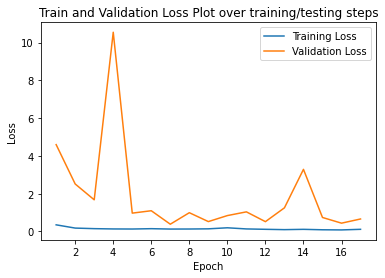

In [4]:
#First Model Training
fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_test_loader = DataLoader(fl_test, batch_size=BATCH_SIZE_FL, shuffle=True)
    
fl_model = model.CNN(dropout=DROPOUT_FL).to(device)
fl_optimizer = optim.AdamW(fl_model.parameters(), lr=L_RATE_FL, weight_decay=WD_FL)
    
print("Training the first model to classify normal and infected images")
model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")

print("\n\n")
print("Test Accuracy of the first model:")
model.test(fl_model, device, fl_test_loader)

fl_model.to("cpu")
    
model.save_model(fl_model, fl_optimizer, './saved_models/fl_model.pth')

Training the Second Layer Model




Training the second model to classify COVID and non-COVID images


Epoch 1



Validation loss: 0.49211595952510834
Validation set accuracy:  85.56430446194226 %


Epoch 2



Validation loss: 0.4057418406009674
Validation set accuracy:  85.56430446194226 %


Epoch 3



Validation loss: 0.34254951775074005
Validation set accuracy:  90.55118110236221 %


Epoch 4



Validation loss: 0.34765932460625965
Validation set accuracy:  89.23884514435696 %


Epoch 5



Validation loss: 0.3216686397790909
Validation set accuracy:  91.86351706036746 %


Epoch 6



Validation loss: 0.3235943714777629
Validation set accuracy:  89.501312335958 %


Epoch 7



Validation loss: 0.3688988834619522
Validation set accuracy:  84.7769028871391 %


Epoch 8



Validation loss: 0.3278518170118332
Validation set accuracy:  90.0262467191601 %


Epoch 9



Validation loss: 0.3346448987722397
Validation set accuracy:  88.97637795275591 %


Epoch 10



Validation loss: 0.325715238849322
Validation set accuracy:  88.18897637795276 %


Epoch 11



Validation loss: 0.35311757028102875
Validation set accuracy:  88.97637795275591 %


Epoch 12



Validation loss: 0.4297584146261215
Validation set accuracy:  79.26509186351706 %


Epoch 13



Validation loss: 0.4103199889262517
Validation set accuracy:  82.93963254593176 %


Epoch 14



Validation loss: 0.3475201080242793
Validation set accuracy:  87.4015748031496 %


Epoch 15



Validation loss: 0.3434201255440712
Validation set accuracy:  88.4514435695538 %



Test Accuracy of the second model:
Test set accuracy:  64.70588235294117 %


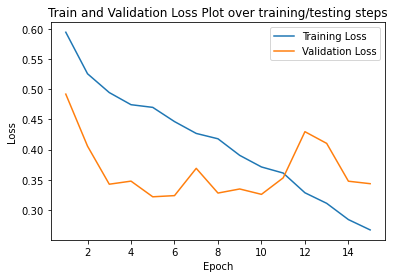

In [5]:
#Second Model Training
sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_test_loader = DataLoader(sl_test, batch_size=BATCH_SIZE_SL, shuffle=True)
    
sl_model = model.CNN(dropout=DROPOUT_SL).to(device)  
sl_optimizer = optim.AdamW(sl_model.parameters(), lr=L_RATE_SL, weight_decay=WD_SL)
    
print("\n\n")
print("Training the second model to classify COVID and non-COVID images")
model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    
print("\n\n")
print("Test Accuracy of the second model:")
model.test(sl_model, device, sl_test_loader)
    
sl_model.to("cpu")
    
model.save_model(sl_model, sl_optimizer, './saved_models/sl_model.pth')

Analyzing the performance of each model (first layer and second layer models) 

Learning Curve of the First Layer Model

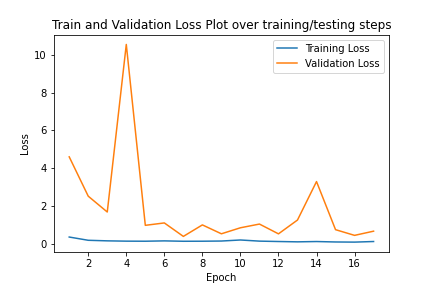

In [6]:
Image(filename='./saved_graphs/fl_learning_curve.png') 

Learning Curve of the Second Layer Model

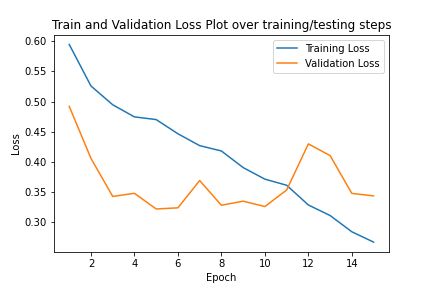

In [7]:
Image(filename='./saved_graphs/sl_learning_curve.png') 

Combine the 2 Models and Test the results on validation and test

Validation Results
Accuracy: 0.8243902325630188
Precision: [0.8877551020408163, 0.68125, 0.8648648648648649]
Recall: [0.7435897435897436, 0.7841726618705036, 0.9256198347107438]

Test Results
Accuracy: 0.6399999856948853
Precision: [1.0, 0.5384615384615384, 0.5714285714285714]
Recall: [0.625, 0.7777777777777778, 0.5]



Visualizing the Test Set: 


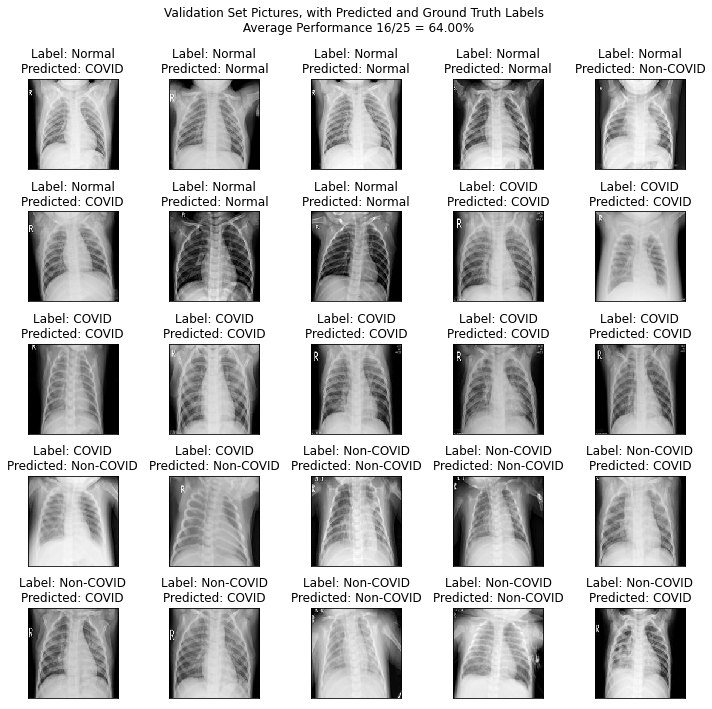

In [8]:
final_val_loader = DataLoader(final_val, batch_size=BATCH_SIZE_FL, shuffle=False)
final_test_loader = DataLoader(final_test, batch_size=BATCH_SIZE_FL, shuffle=False)
    
combined_model = model.load_combined('./saved_models/fl_model.pth','./saved_models/sl_model.pth',WD_FL ,L_RATE_FL, DROPOUT_FL, WD_SL, L_RATE_SL, DROPOUT_SL)
pred = combined_model.predict_loader(device, final_val_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_val_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)
print("Validation Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))
print()
pred = combined_model.predict_loader(device, final_test_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_test_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)

print("Test Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))

print("\n\n")
print("Visualizing the Test Set: ")
utils.generate_performance_display(final_test_loader, pred, combined_labels)